# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Loading the dataset

In [ ]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Project 2/Loan_Modelling.csv')
# returns the first 5 rows
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df = data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.shape

(5000, 14)

* The data has 5000 rows and 14 columns



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* Personal_Loan is the dependent variable - type integer.
* All the dependent variables except for CCAvg are integer type as well. CCAvg is float.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The Age ranges from 23 to 67.
* The Average Income is approximately 74 thousand dollars.
* The Mortgage has a max value of 635 thousand dollars while 101 thousand dollars at the 75th percentile.
* Average spending on credit cards per month is around 2000 dollars on average.

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["ID"].nunique()

5000

In [ ]:
df["ZIPCode"].nunique()

467

* The ID column contains only unique values, so we can drop it

In [ ]:
df.drop(["ID", "ZIPCode"], axis=1, inplace=True) #ID and ZIPCode column were droped

#### Checking the Unique Values

In [ ]:
# Checking the unique values in the Age
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [ ]:
# Checking the unique values in the Experience
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* There are anomalous values with negative values in the Experience.

In [ ]:
# To check anomalous values for experience that are below zero
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

* The anomalous values with negative values in the Experience are -1, -2 and -3 that needs to be corrected in the following steps.

In [ ]:
# Checking the unique values in the Income
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [ ]:
# Checking the unique values in the Family
df['Family'].unique()

array([4, 3, 1, 2])

In [ ]:
# Checking the unique values in the CCAvg
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [ ]:
# Checking the unique values in the Education
df['Education'].unique()

array([1, 2, 3])

In [ ]:
# Checking the unique values in the Mortgage
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [ ]:
# Correcting the anomalous experience values
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)
df[df["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answers**:

1. The distribution is heavily skewed to the right, with a notable presence of outliers. The visualization indicates that 75% of customers either have no mortgage or possess a mortgage valued at less than $100,000.
2. A total of 1,470 customers possess a credit card.
3. The personal loan variable exhibits a relatively strong correlation with income, credit card average spending (CCAvg), and certificate of deposit (CD_Account).
4. Seventy-five percent of customers who either approved or declined a personal loan offer fall within the age range of 25 to 65 years old. Individuals younger than 25 and older than 65 are less inclined to take out a personal loan. The correlation between age and personal loan acceptance is negligible, and outliers do not significantly influence the conclusions.
5. Customers with a professional degree exhibit the highest likelihood of taking out personal loans with the bank.

## Univariate and Bivariate Analysis

In [ ]:
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    df: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], dfa[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Observation on Age

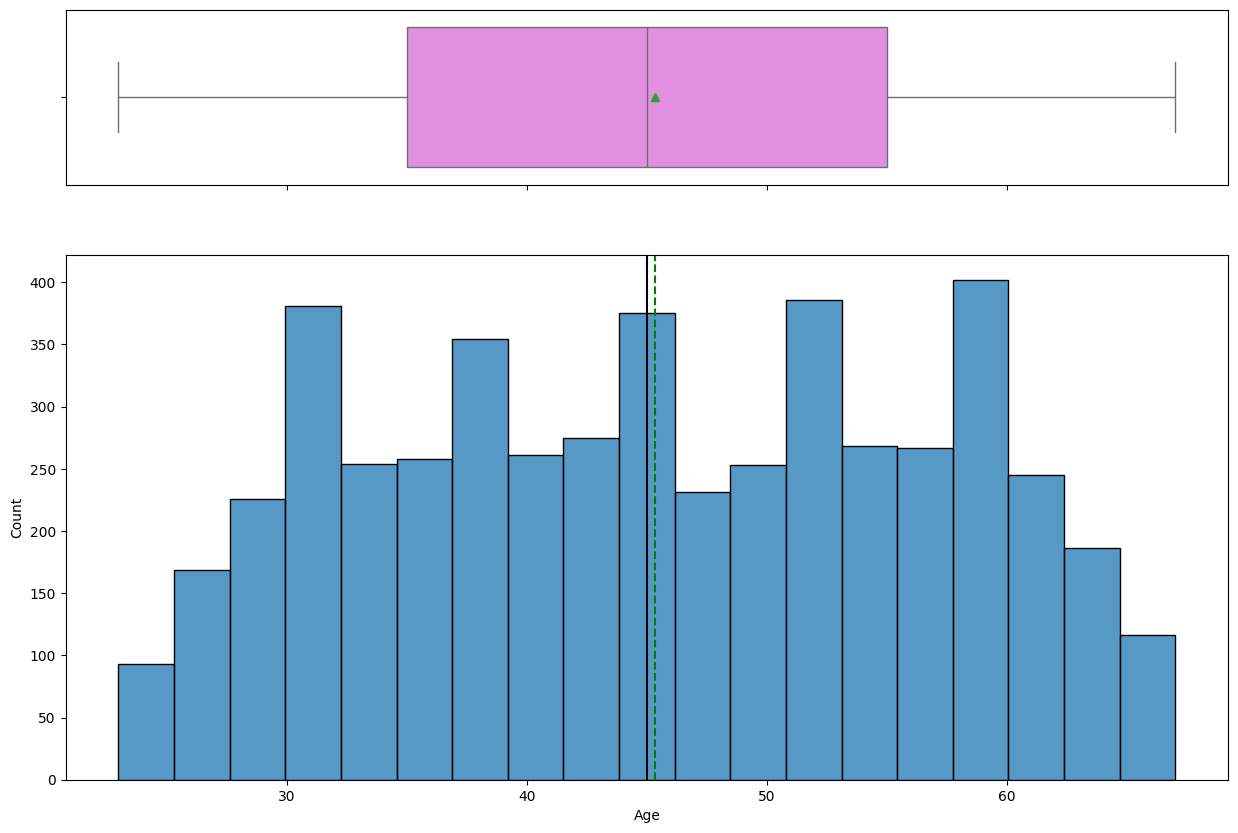

In [ ]:
histogram_boxplot(df, "Age")

* The average age of the bank's customers is 45 years.

### Observation on Experience

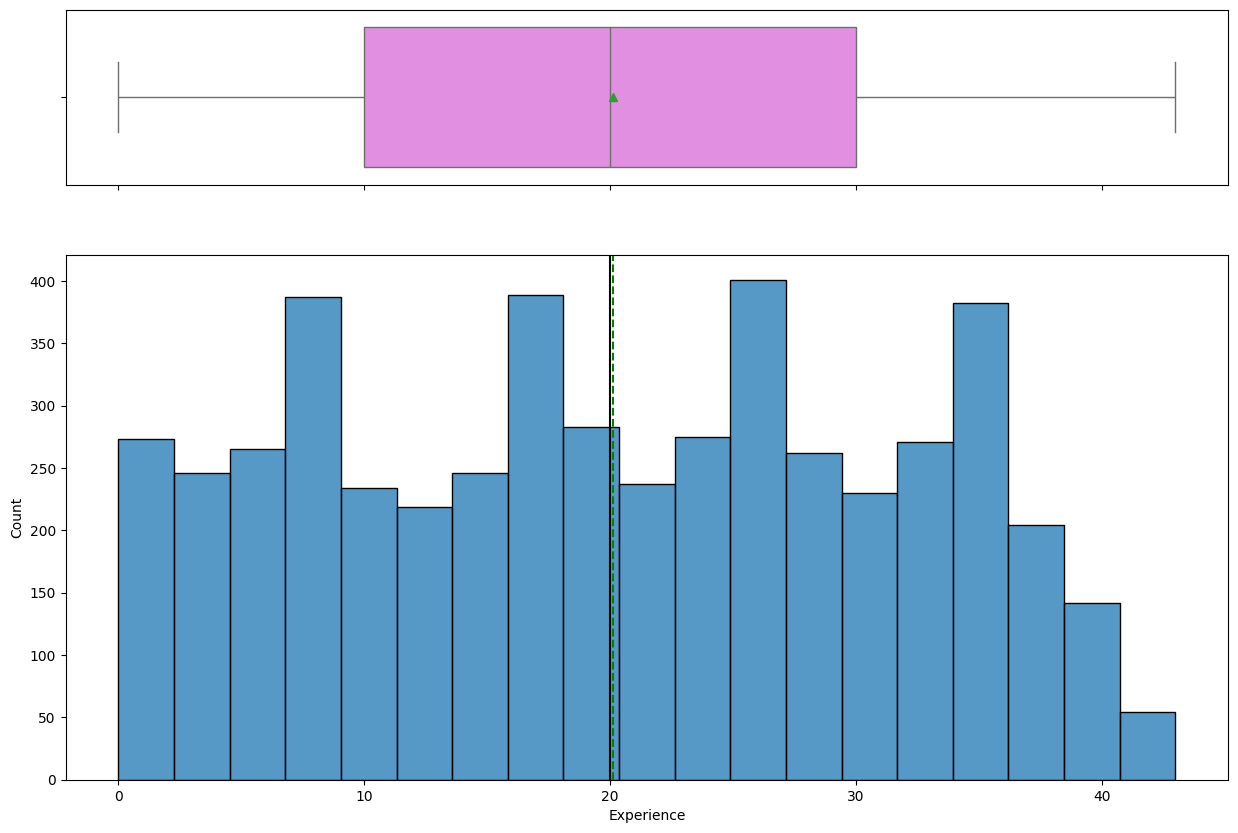

In [ ]:
histogram_boxplot(df, "Experience")

* The majority of customers boast roughly 20 years of professional experience.
* Some customers have accrued over 40 years of professional experience.

### Observation on Income

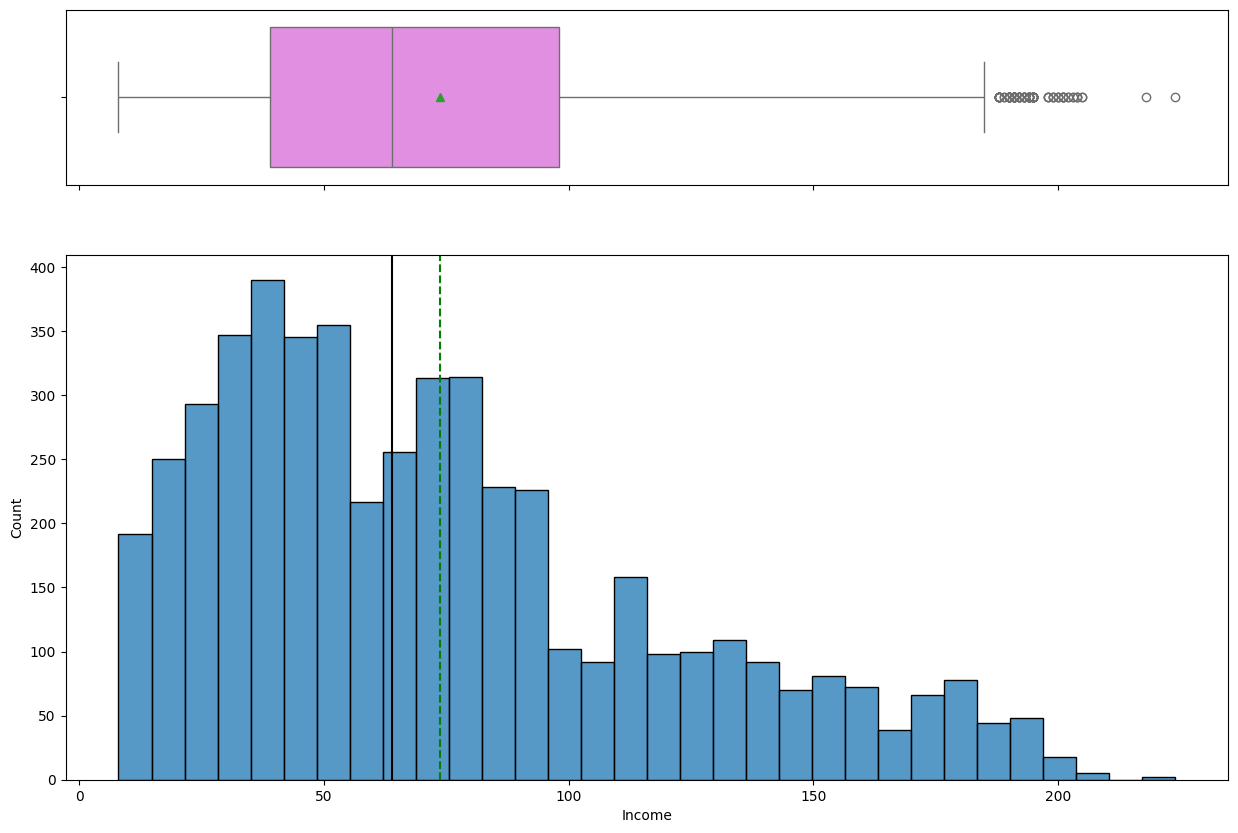

In [ ]:
histogram_boxplot(df, "Income")

* The average annual income for customers is approximately $75,000. Additionally, the plot indicates outliers with incomes exceeding 175,000 dollars annually.

### Observation on Family

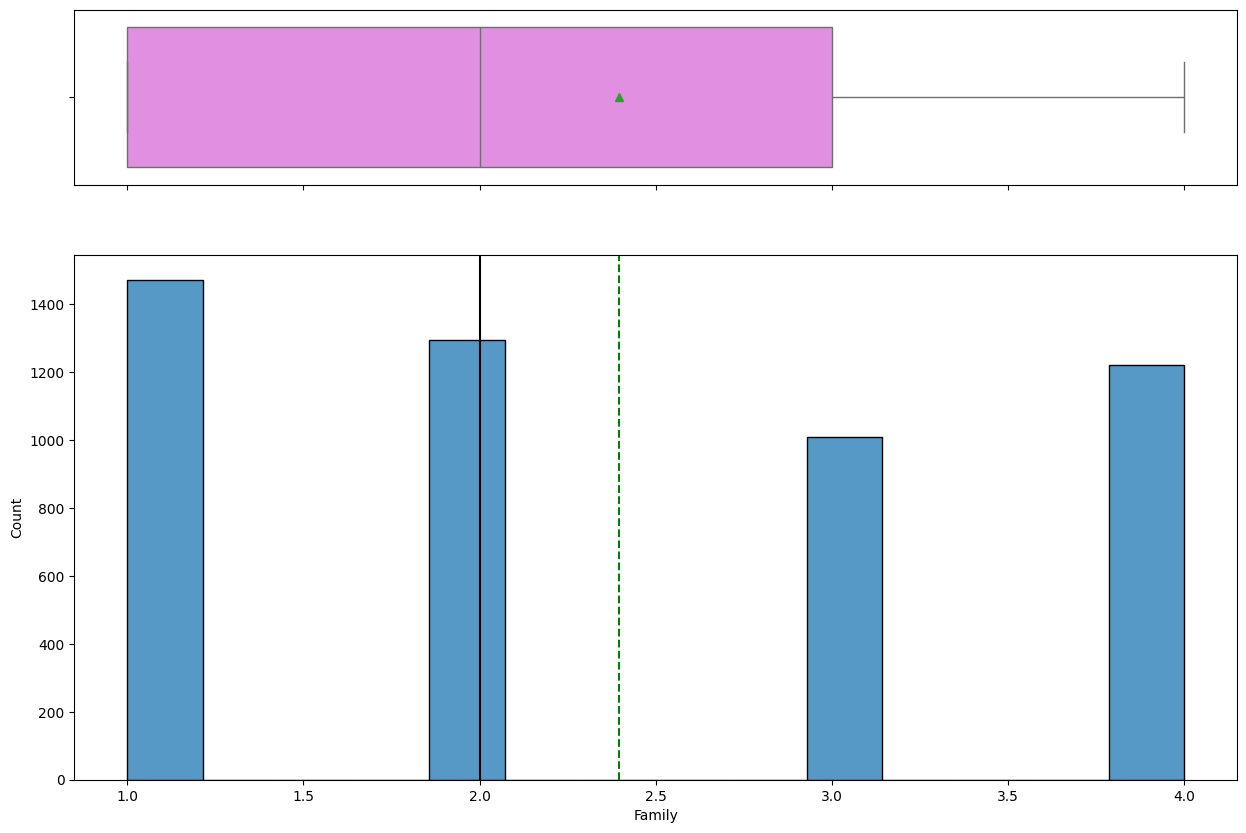

In [ ]:
histogram_boxplot(df, "Family")

* The largest family size observed is 4, with slightly over 1200 customers belonging to households of this size.

### Observation on CCAvg

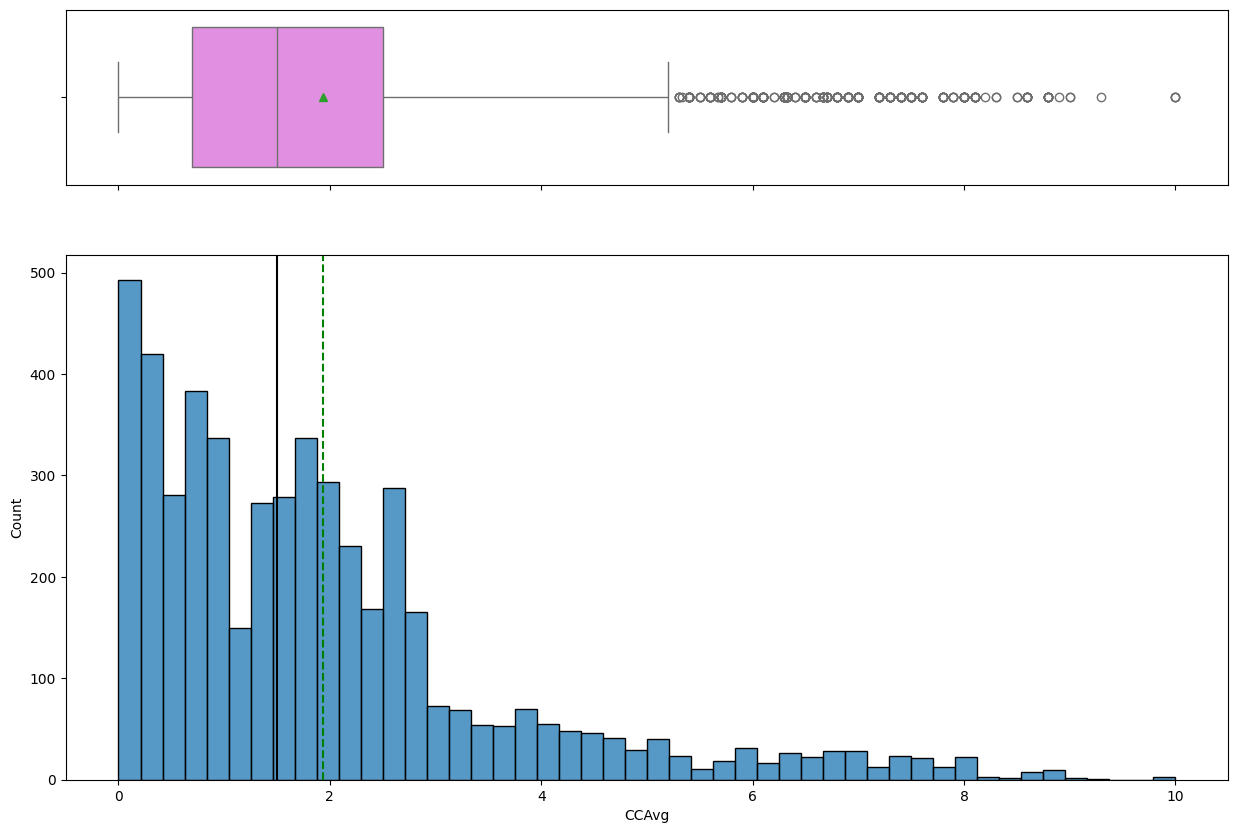

In [ ]:
histogram_boxplot(df, "CCAvg")

* The plot exhibits right-skewness, indicating an average credit card spending of approximately 2000 dollars per month, with outliers revealing some customers spending as much as 10,000 dollars per month.

### Observation on Education

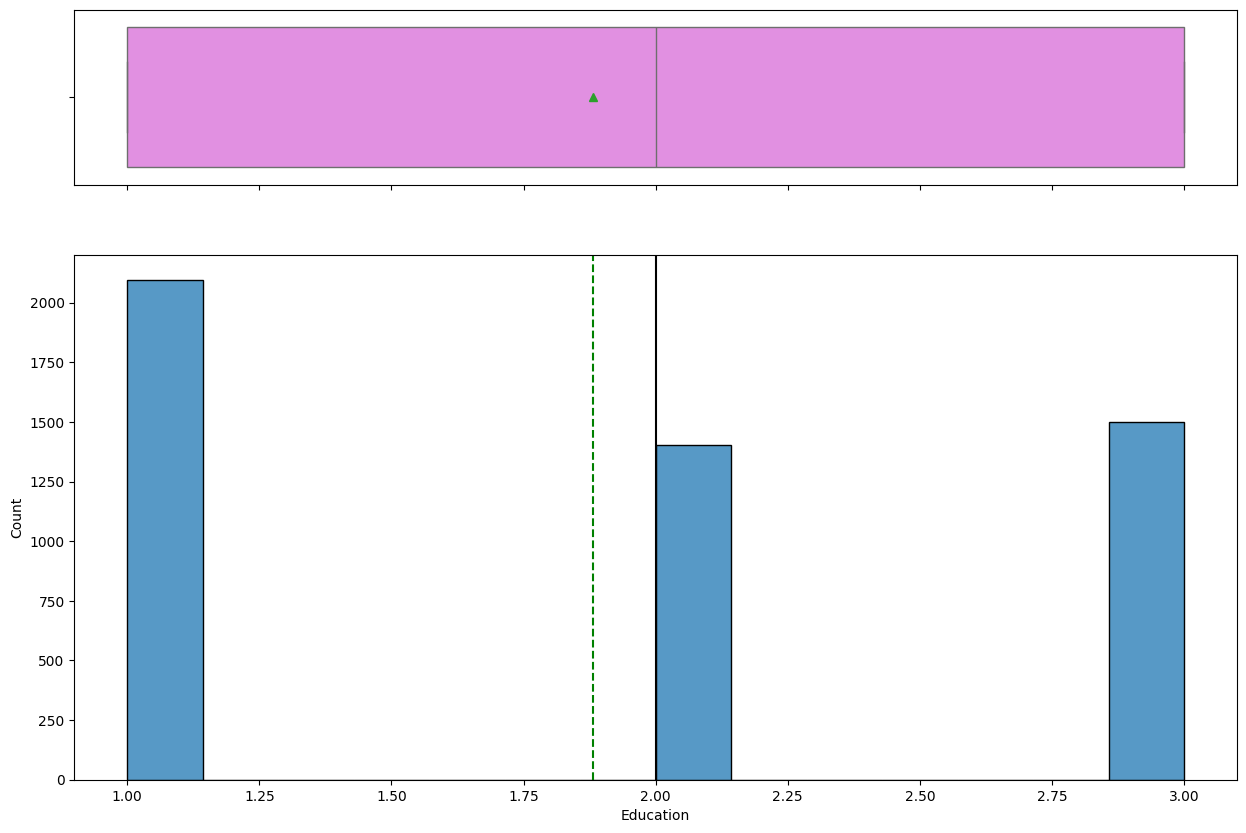

In [ ]:
histogram_boxplot(df, "Education")

* The majority of customers possess undergraduate degrees.
* Approximately 1,500 customers hold Advanced/Professional degrees.
* Around 1,350 customers hold graduate degrees.

### Observation on Mortgage

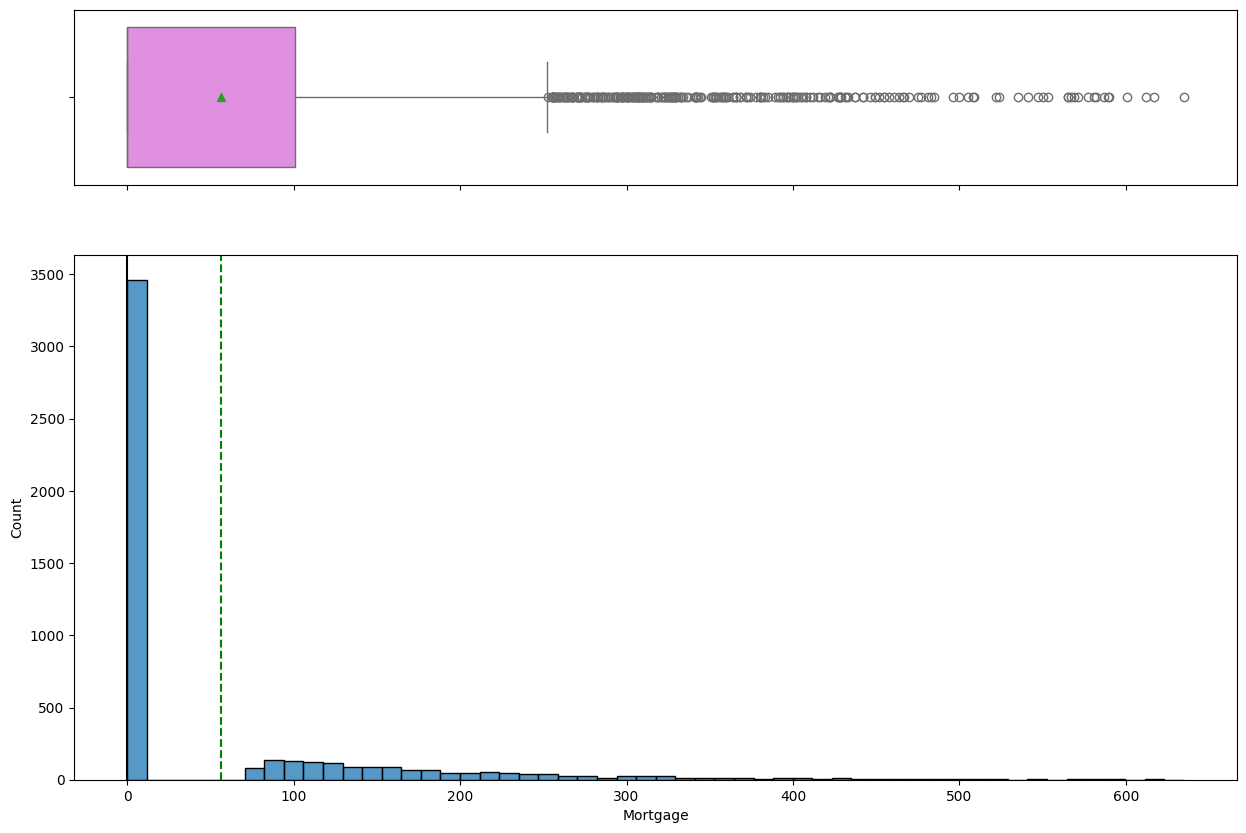

In [ ]:
histogram_boxplot(df, "Mortgage")

* The average mortgage amount hovers around $56,000.
* The plot indicates a pronounced right-skewness.
* A multitude of outliers suggests that high mortgages are predominantly acquired by a select few who possess the financial means to do so. The outliers are noticeable.

### Observation on Personal_Loan

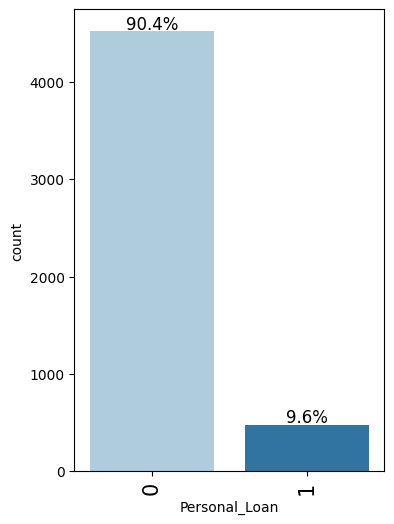

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

* Approximately 500 customers have availed themselves of a personal loan.

### Observation on Securities_Account

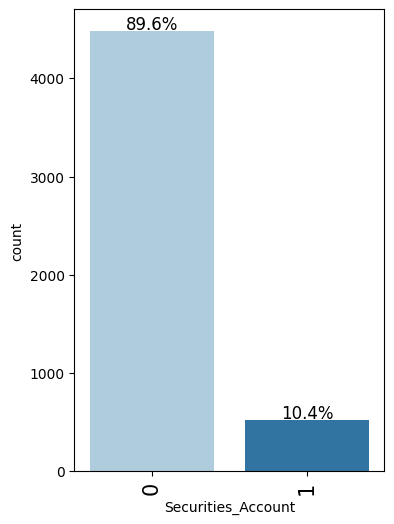

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True)

* Approximately 500 customers maintain security accounts with the bank.

### Observation on CD_Account

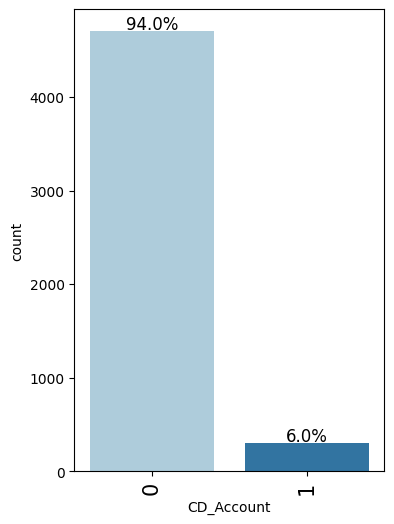

In [ ]:
labeled_barplot(df, "CD_Account", perc=True)

* Only 6 percent of customers possess certificate of deposit accounts with the bank.

### Observation on CreditCard

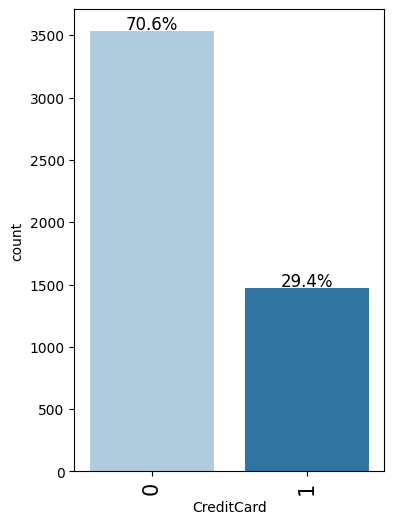

In [ ]:
labeled_barplot(df, "CreditCard", perc=True)

* The plot reveals approximately 1,500 customers possess credit cards.
* Conversely, 3,500 customers are without credit cards.

### Observation on Online

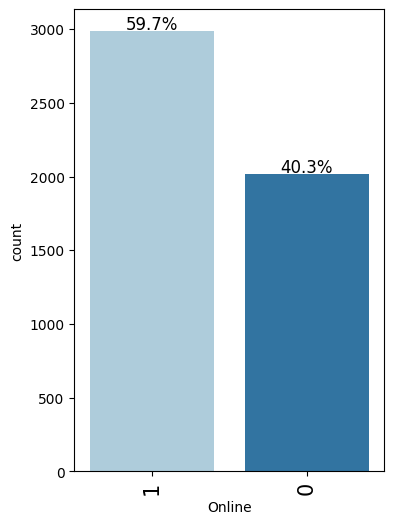

In [ ]:
labeled_barplot(df, "Online", perc=True)

* Around 3000 customers use internet banking.

### observation on correlation

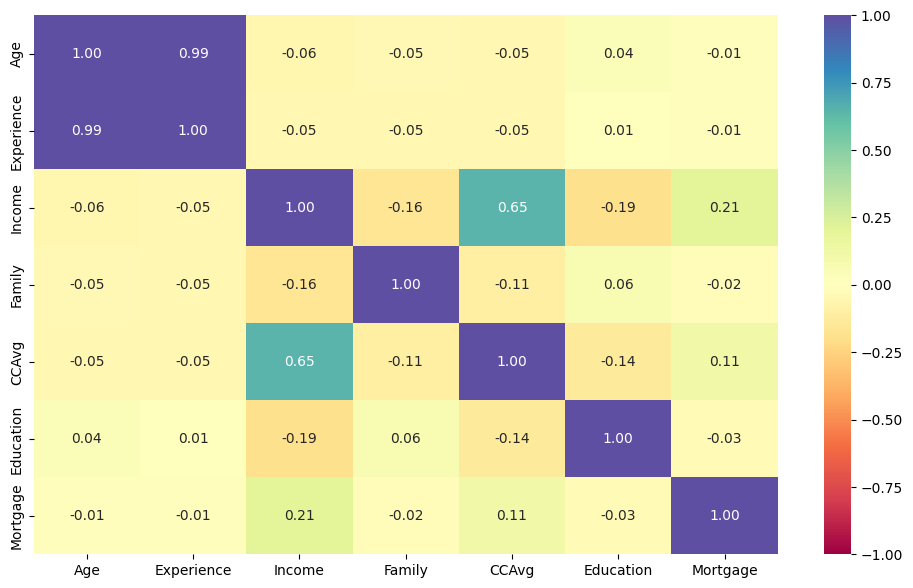

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Personal_Loan')
cols_list.remove('Securities_Account')
cols_list.remove('CD_Account')
cols_list.remove('Online')
cols_list.remove('CreditCard')

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a strong positive correlation between the Experience and Age.
* There's also a correlation between CCAvg (average credit card spending) and Income.


### Personal_Loan vs Age

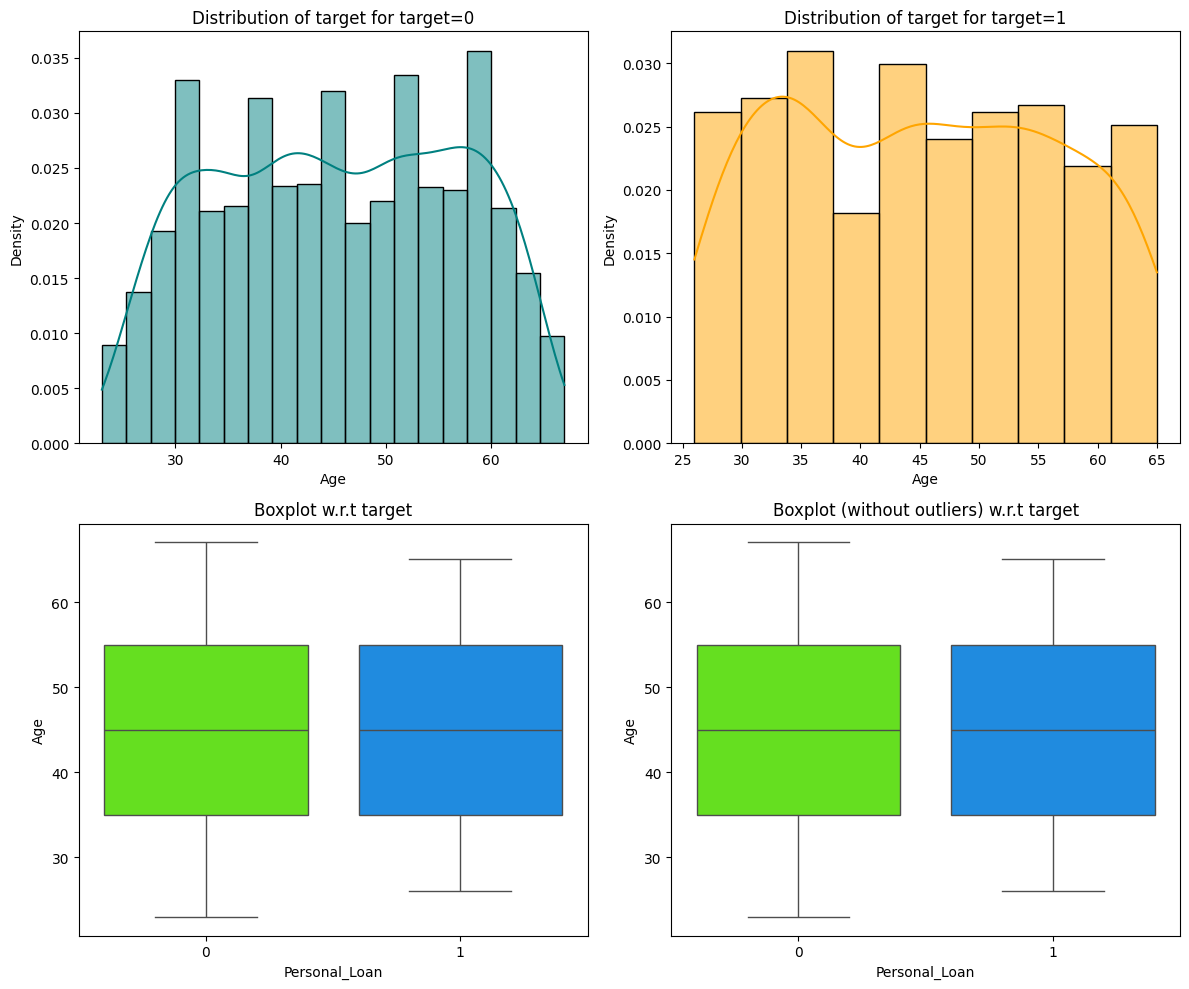

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* The plot illustrates that customers across various age groups are interested in purchasing the loan.
* Given the strong positive correlation between Age and Experience, we can expect their distributions to exhibit similarity with the target.

### Personal_Loan vs Education

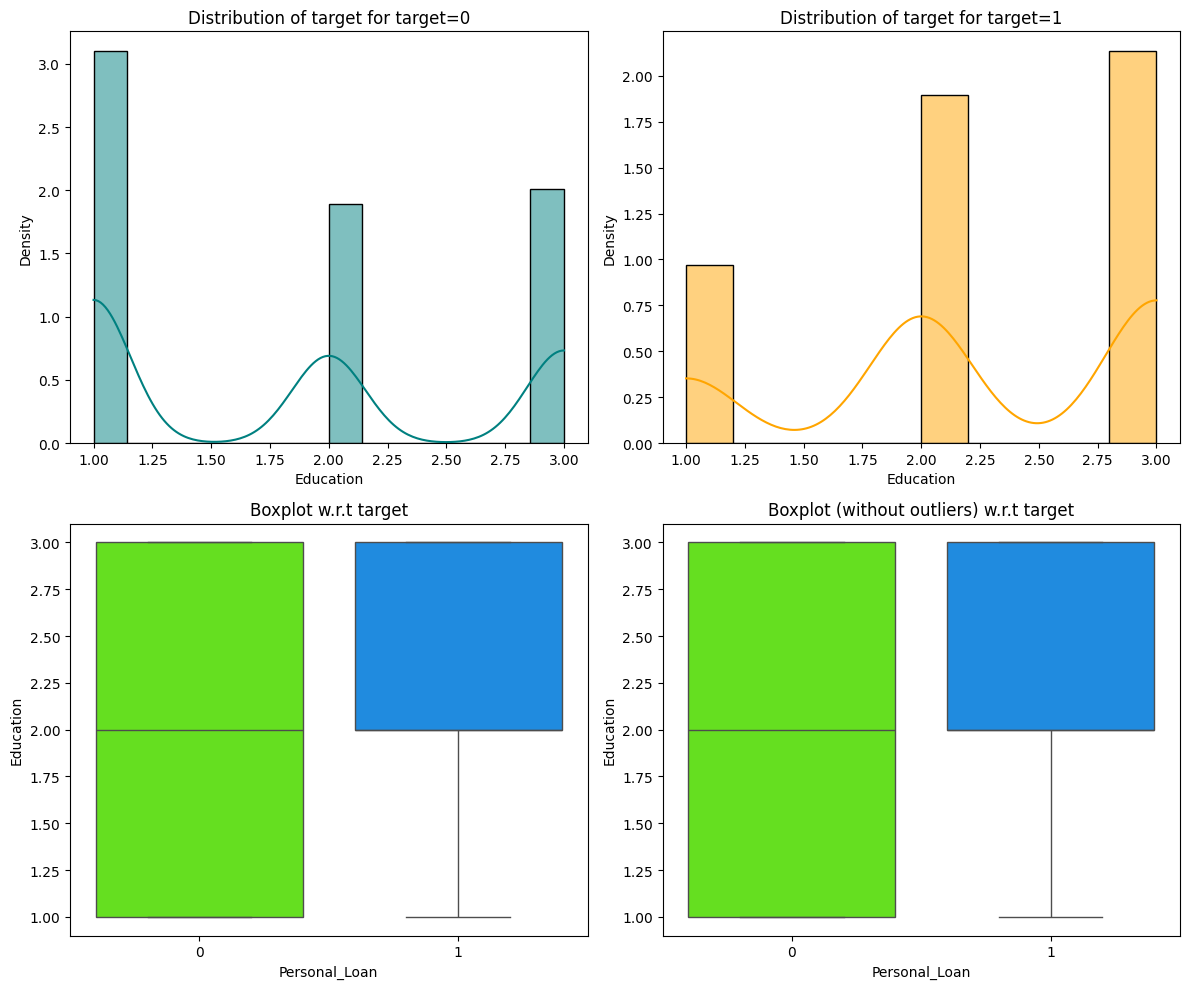

In [ ]:
distribution_plot_wrt_target(data, "Education", "Personal_Loan")

* It indicates that customers with Advanced/Professional degrees are more inclined to purchase a loan.
* Additionally, customers with Undergraduate degrees are less likely to purchase a personal loan.

### Personal_Loan vs Income

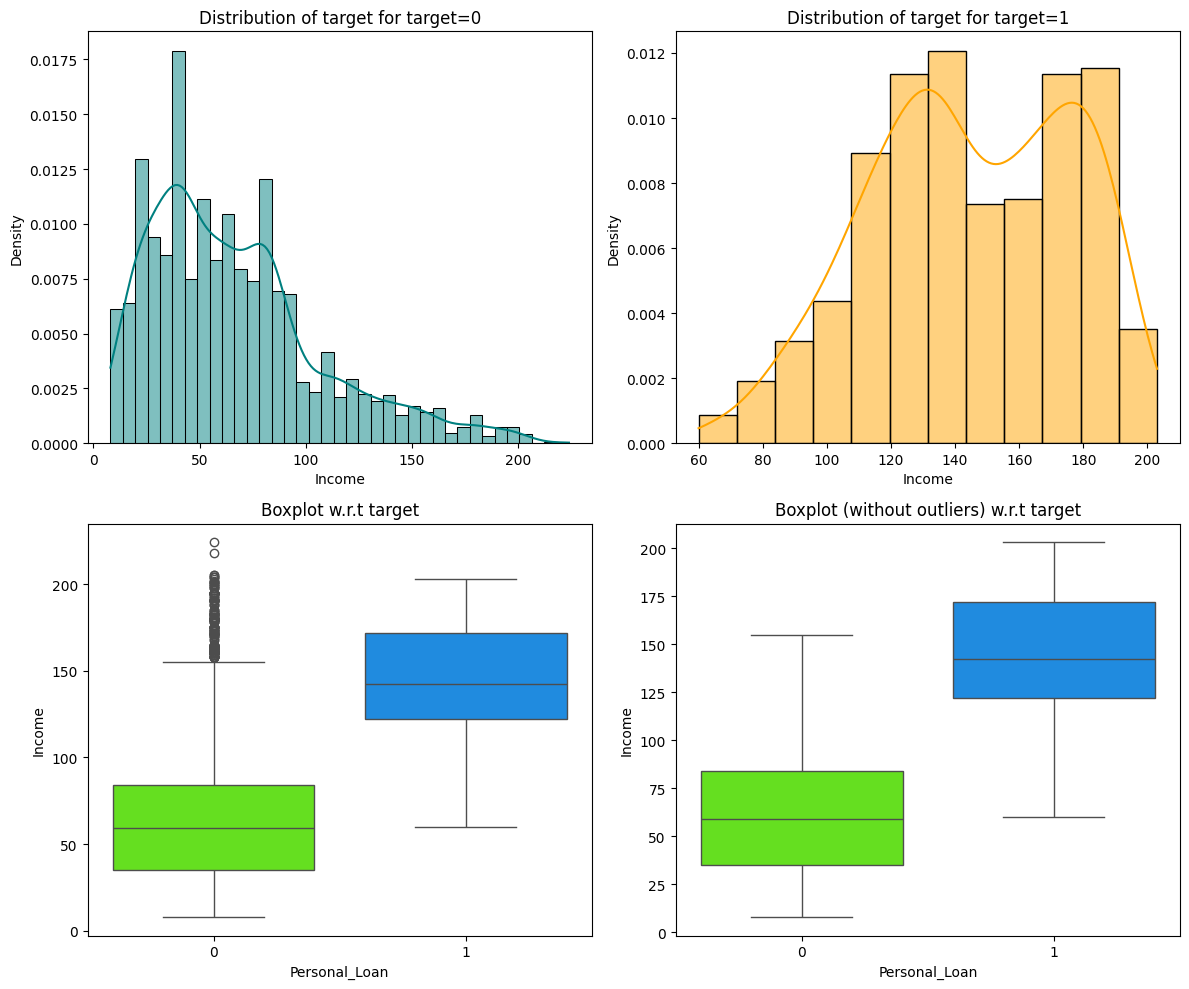

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* The data suggests that customers with higher incomes are more inclined to purchase the loan.
* The lowest annual income among customers purchasing the loan is $60,000.

### Personal_Loan vs Family

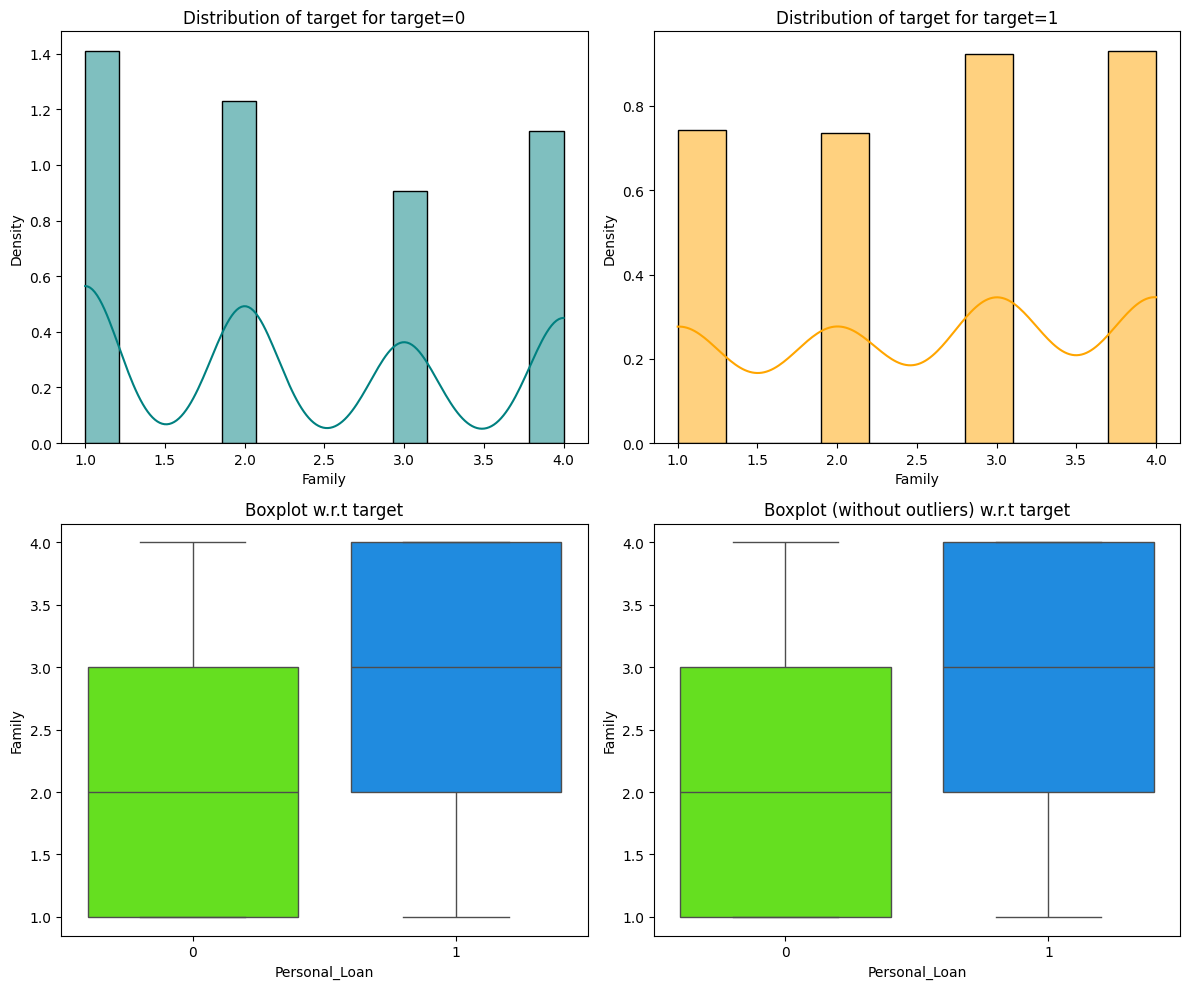

In [ ]:
distribution_plot_wrt_target(data, "Family", "Personal_Loan")

* The data indicates that customers with larger family sizes are more likely to purchase the loan.

### Personal_Loan vs CCAvg

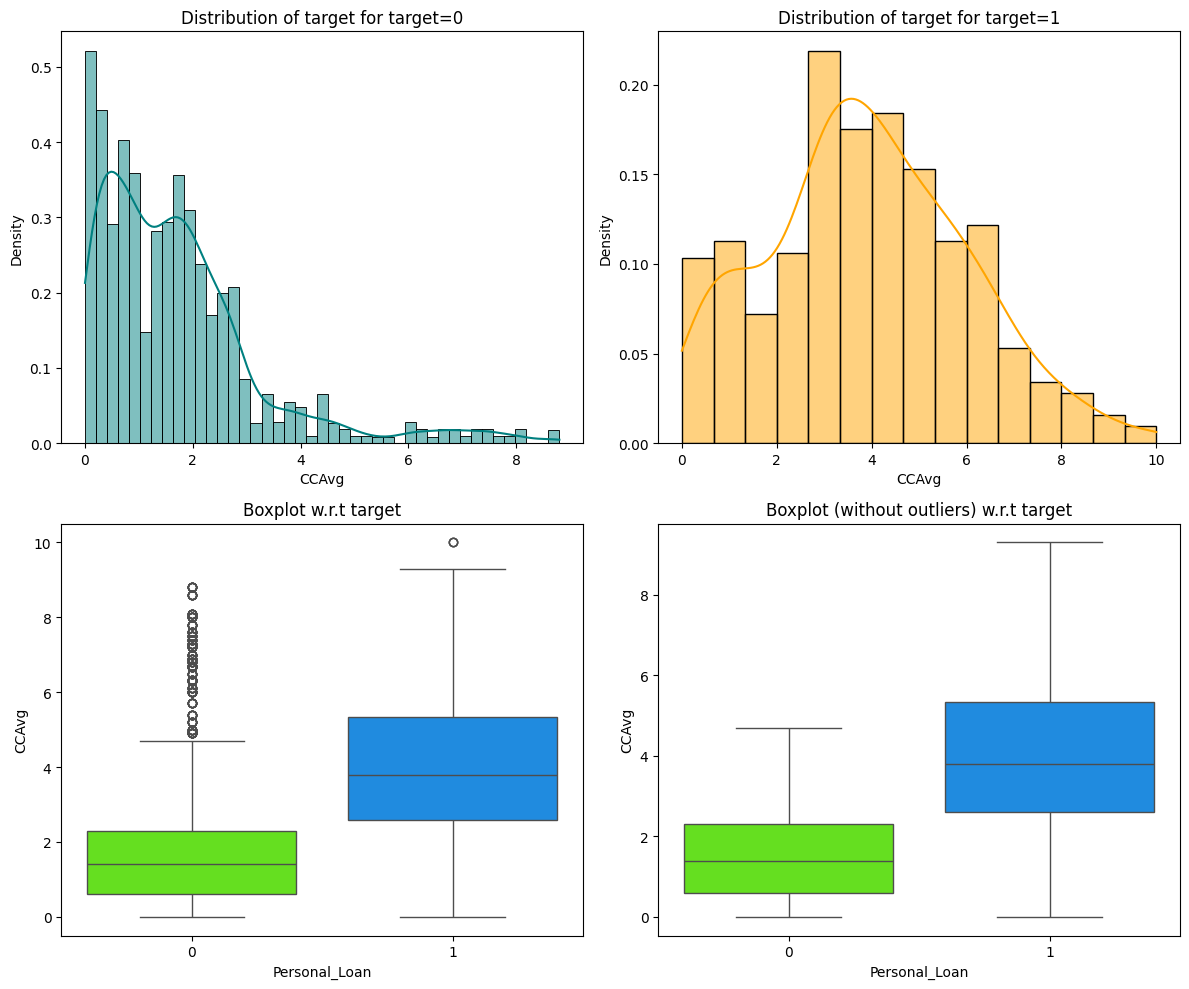

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Customers with an average monthly credit card spending between 3000 dollars and $5000 are more inclined to purchase the loan.

### Personal_Loan vs Mortgage

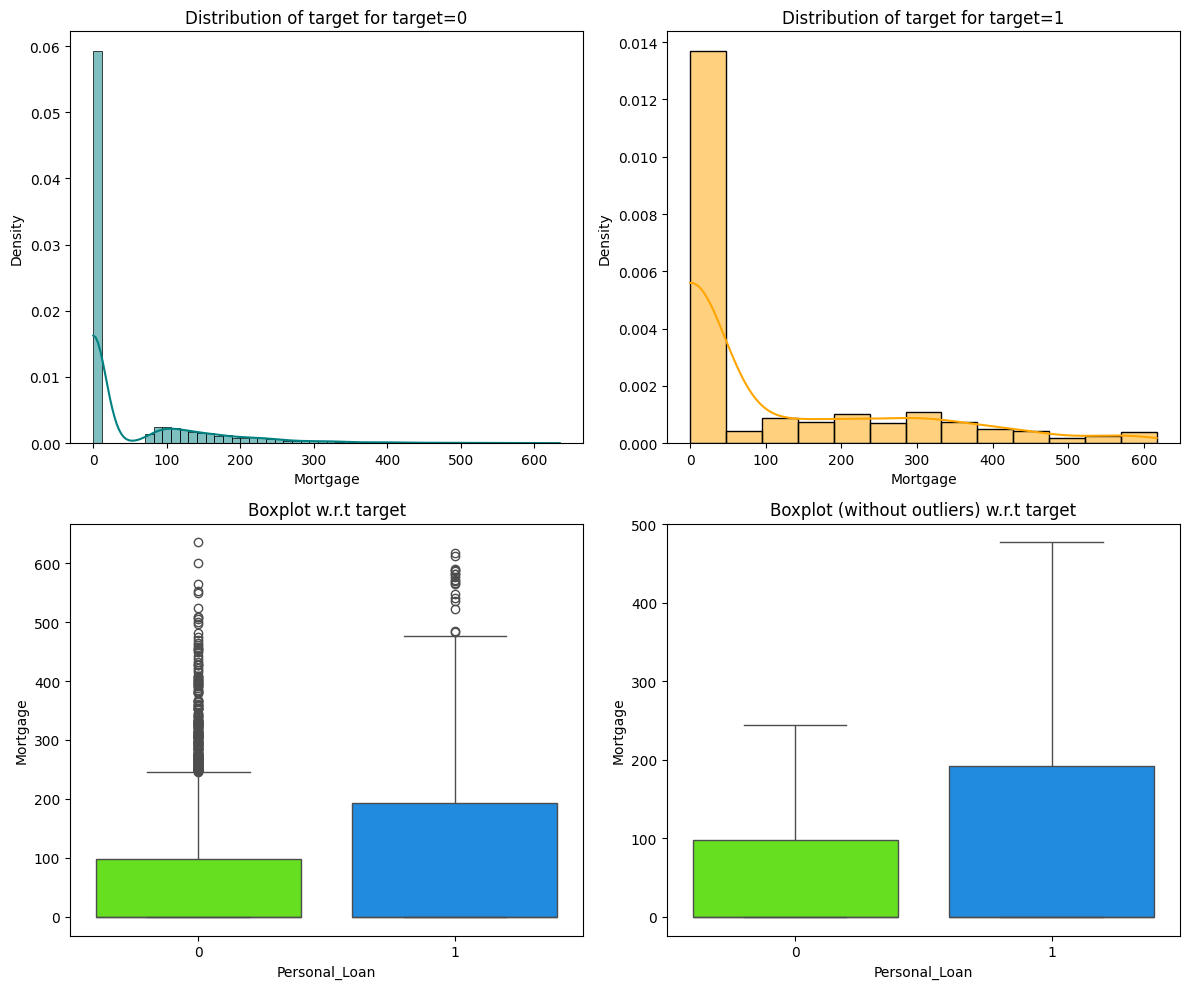

In [ ]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* Customers with mortgages less than $200,000 are more likely to purchase the loan, although there are outliers present in both groups.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Detection

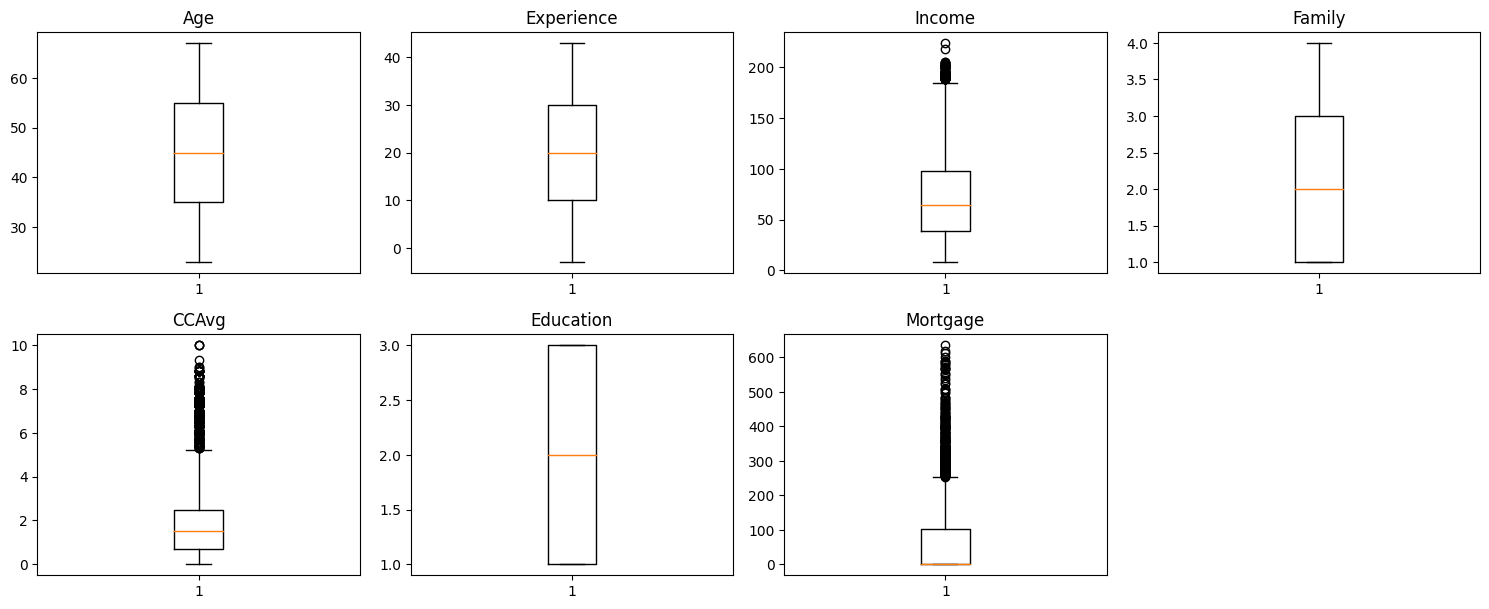

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Personal_Loan') # Removing dummy variables columns from numeric columns to better visualise the outliers
numeric_columns.remove('Securities_Account')
numeric_columns.remove('CD_Account')
numeric_columns.remove('Online')
numeric_columns.remove('CreditCard')
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for Modeling

* The objective is to forecast whether a liability customer will purchase personal loans.
* Prior to model construction, it's essential to partition the data into training, testing, and validation sets to assess the model's performance accurately on unseen data.
* Categorical features need to be encoded, while numerical values should be scaled before proceeding with model development.
* You'll construct a model using the training data and subsequently evaluate its performance.

In [ ]:
# Replacing values in Education with meaningful strings namely 1: Undergrad; 2: Graduate 3: Advanced/Professional
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

In [ ]:
X = df.drop(["Personal_Loan"], axis=1)
Y = df["Personal_Loan"]

# To apply dummies on Education
X = pd.get_dummies(X, columns=['Education'], prefix='Education')

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.4% of observations belongs to class 0 (No) and 9.6% observations belongs to class 1 (Yes), and this is preserved in the train and test sets.

## Model Building

### Decision Tree

In [ ]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight={0:0.5,1:0.5})
model0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

### Model Evaluation Criterion

* False Negative (FN): Predicting that a borrower will not default on their loan, but in reality, they do default.
* False Positive (FP): Predicting that a borrower will default on their loan, but in reality, they do not.
In this scenario:

### FN:
If a model fails to identify borrowers who will default (FN), the company faces the risk of financial losses due to defaulting loans. These losses may include the cost of unpaid loans, collections efforts, and potential legal fees.
### FP:
If a model incorrectly predicts that a borrower will default (FP), the company may incur unnecessary costs associated with additional scrutiny, such as manual review processes or increased interest rates to mitigate perceived risk.

Given these considerations, minimizing FN is typically more critical in the context of personal loans. Maximizing recall, which reduces FN, becomes paramount. Higher recall means fewer instances of failing to identify borrowers who will default, thereby minimizing financial losses associated with defaulted loans.

### Model Building

First, let's create functions to calculate different metrics and the confusion matrix so that we can avoid duplicating code when evaluating each model.

* The function "model_performance_classification_sklearn" will be utilized to assess the performance of models.
* The function "confusion_matrix_sklearn" will be employed to visualize the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

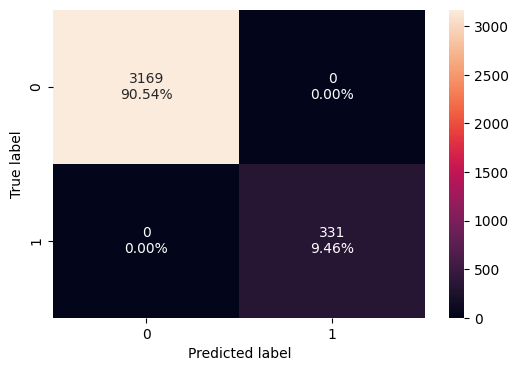

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


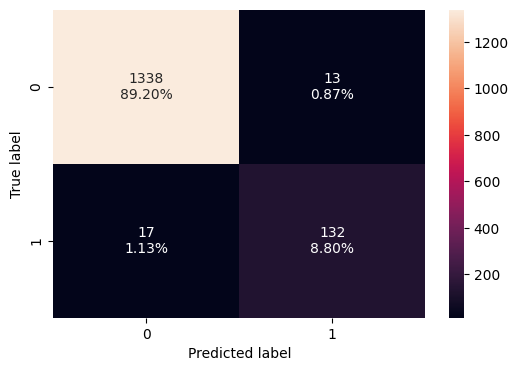

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


* In finance studies, it's noted that overfitting is a concern, and the impact of False Negatives (FN) on total losses outweighs that of False Positives (FP). Consequently, maximizing Recall appears to be the optimal objective, given its significance in minimizing missed opportunities to detect potential losses.
* These metrics provide insights into how well the decision tree model is performing on both the training and test datasets. The perfect scores on the training data indicate potential overfitting.

### Visualizing the Decision Tree

In [ ]:
# To create a list of independent variable strings
feature_names = list(X_train.columns)

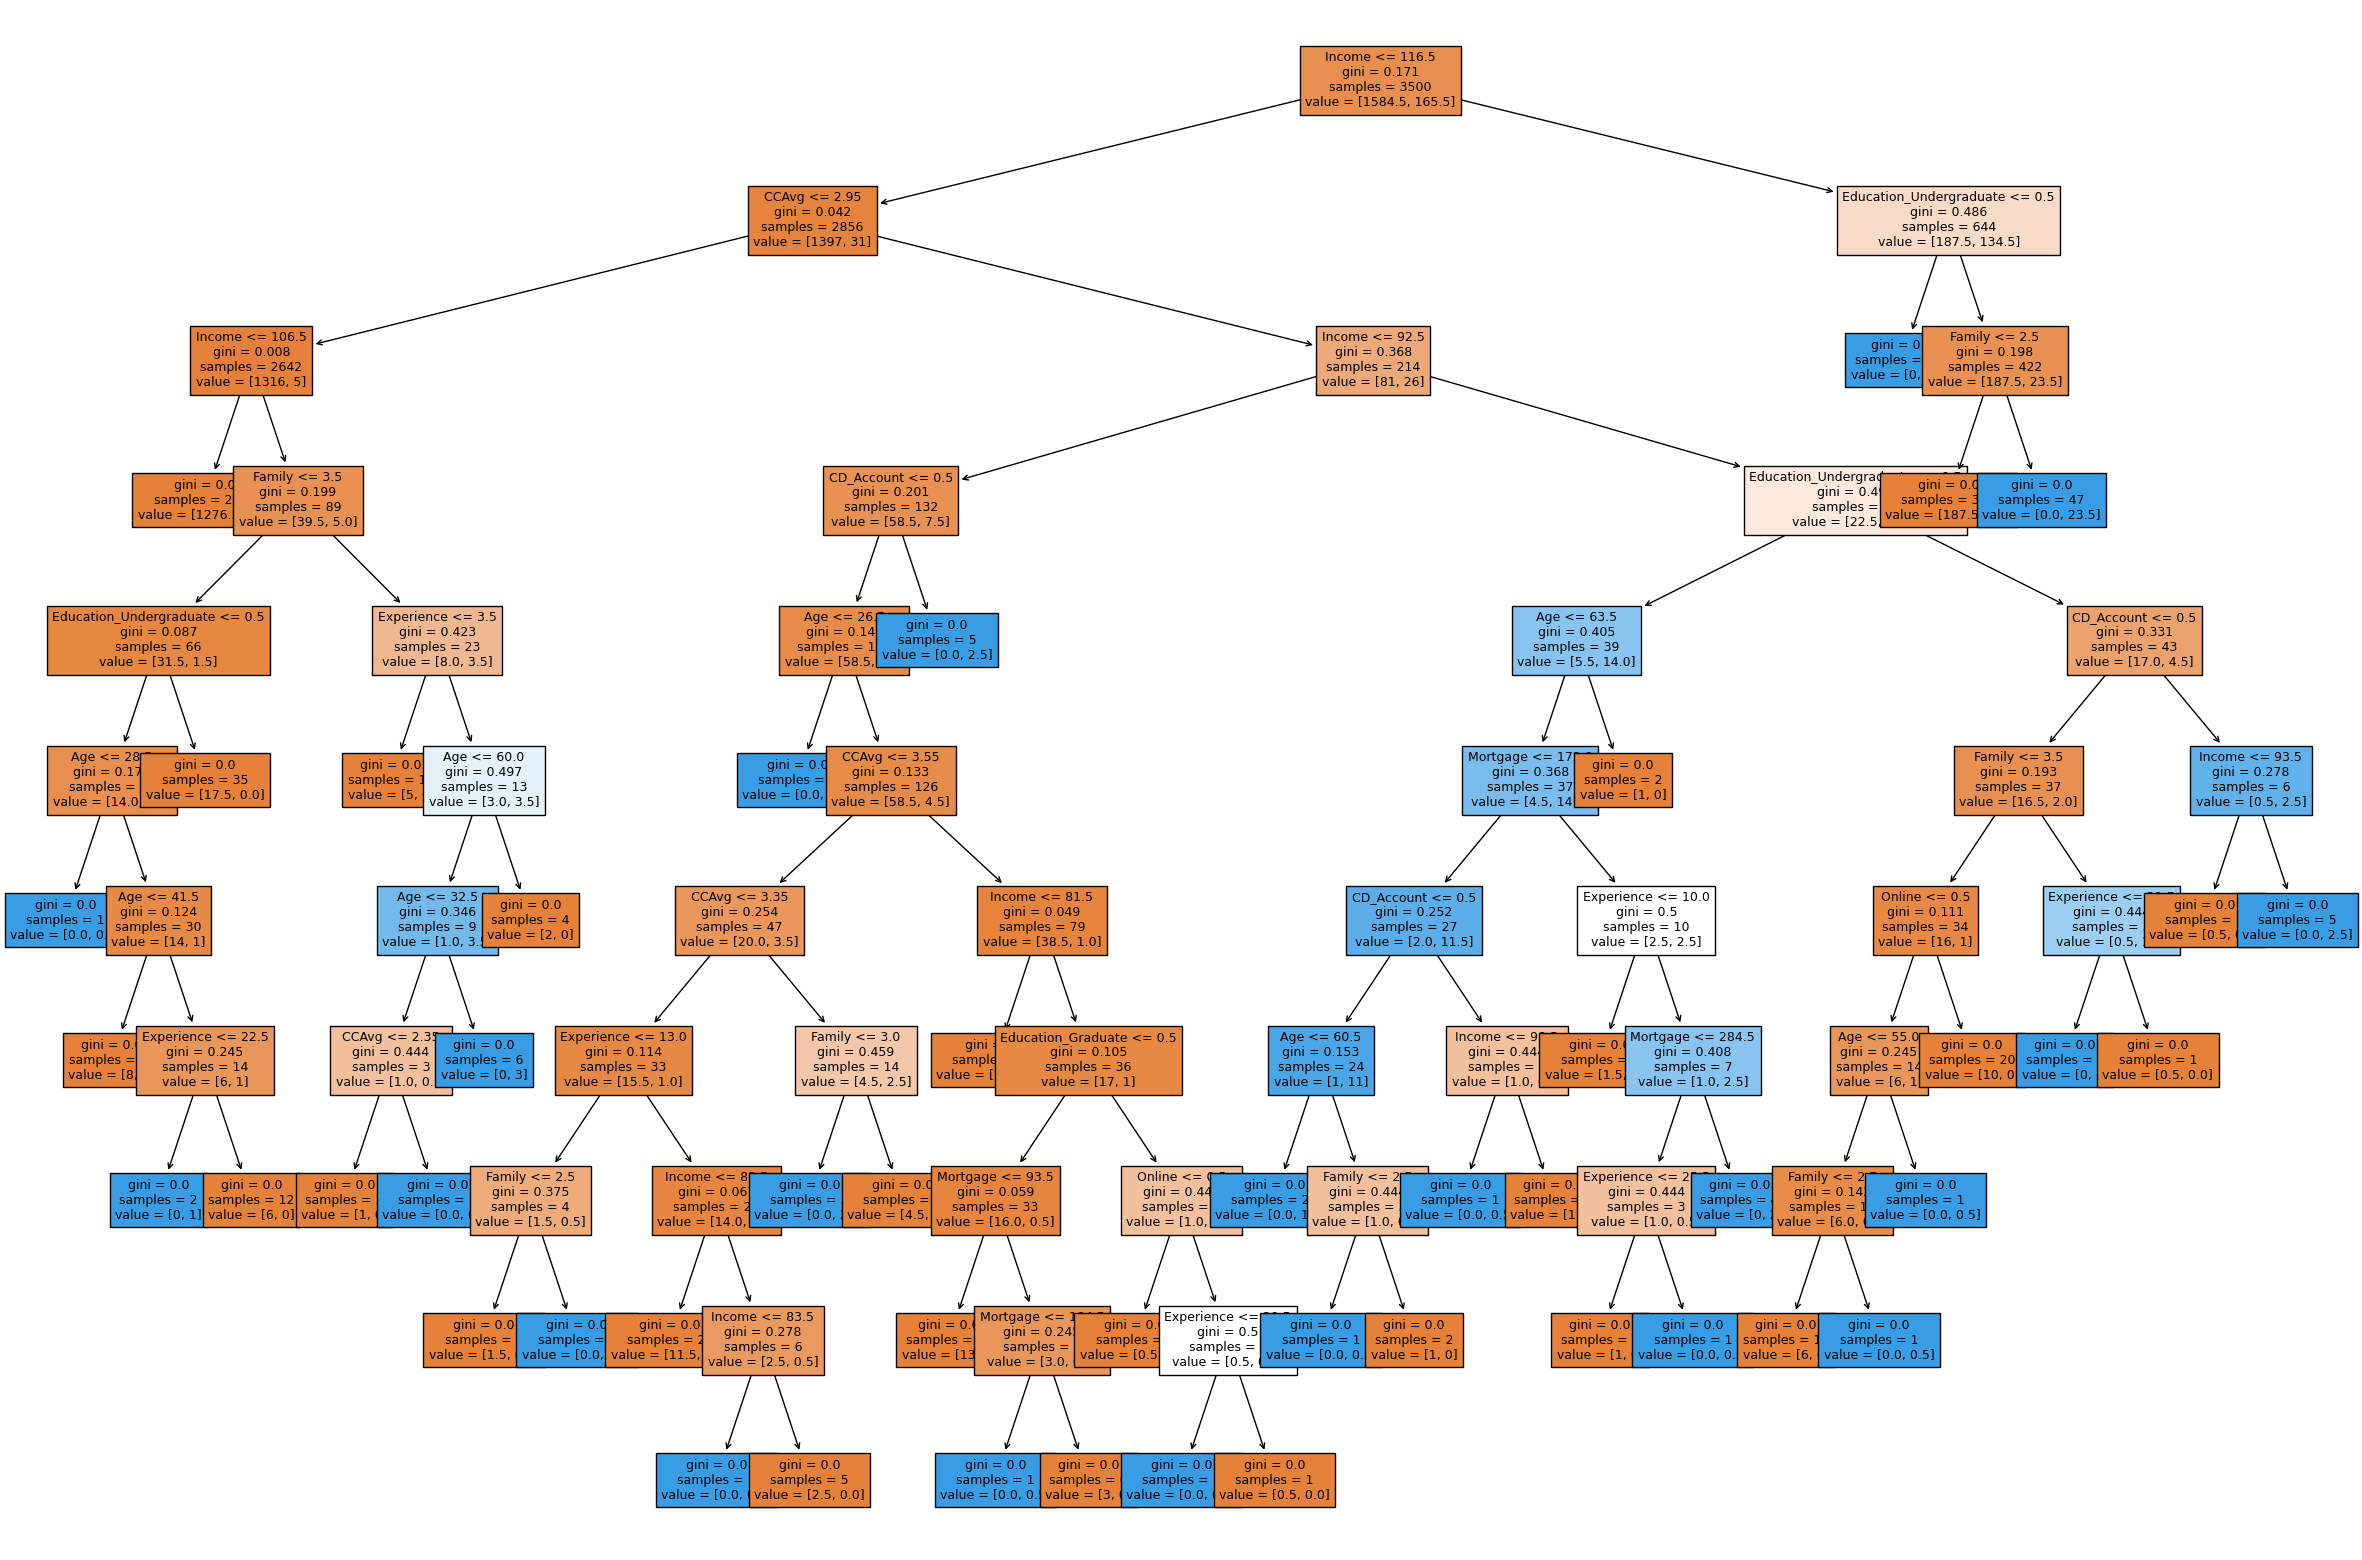

In [ ]:
# To visualize the tree
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* In a decision tree, branches highlighted in bright colors signify areas of high Gini impurity, indicating regions where further examination is necessary to potentially reduce impurity.

In [ ]:
# To print the rules of a decision tree
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [1276.50, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Experience <= 22.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Experience >  22.50
|   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |--- weights: [17.50, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [5.00, 0.00] clas

In [ ]:
# To calculated importance of features in the tree building meaning total reduction of the criterion brought by that feature.
print(
    pd.DataFrame(
        model0.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.401465
Income                   0.306244
Family                   0.165104
CCAvg                    0.044408
CD_Account               0.025711
Age                      0.024890
Experience               0.021425
Mortgage                 0.008792
Online                   0.001117
Education_Graduate       0.000843
Securities_Account       0.000000
CreditCard               0.000000
Education_Professional   0.000000


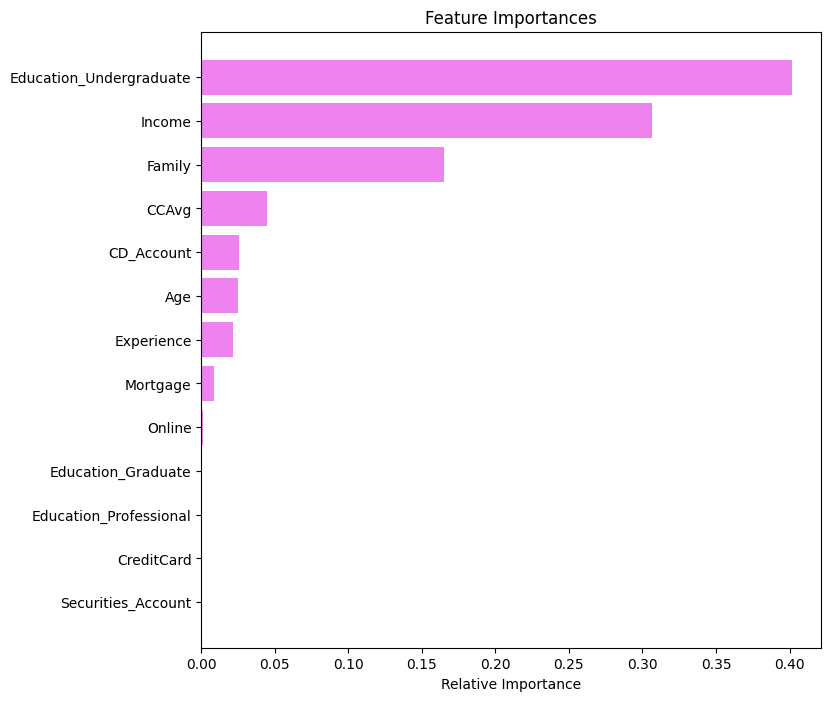

In [ ]:
# To plot importance of features in the tree building meaning total reduction of the criterion brought by that feature.
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* It has been noted that variables such as Education_Undergraduate, Income, and Family collectively contribute to 80% of the model's accuracy.

## Model Comparison and Final Model Selection



### Decision Tree (Pre-pruning)
#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1,class_weight={0: 0.5, 1: 0.5})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "max_leaf_nodes": [1, 2, 5, 7, 10],
    "min_samples_split": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=6,
                       max_leaf_nodes=10, random_state=1)

### Checking performance on training data

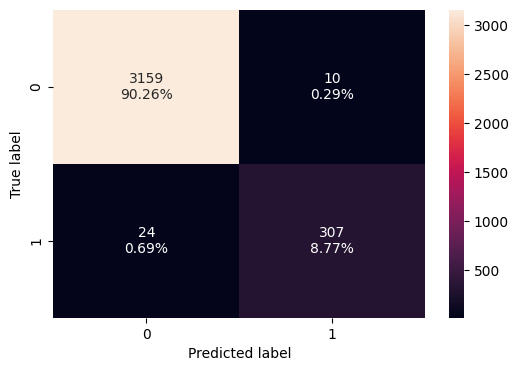

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


### Checking performance on testing data

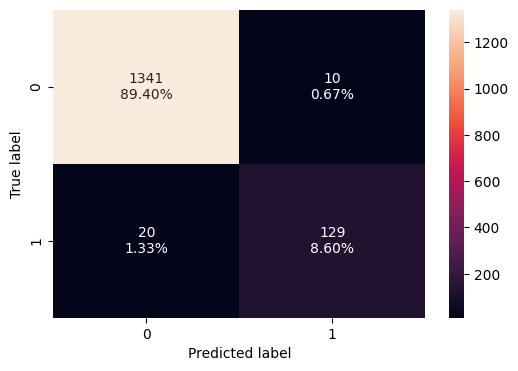

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


* After hyperparameter tuning the model performance has almost remained the same and the model has become simpler.

### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns) # Create a list of feature names
importances = estimator.feature_importances_ # Calculate feature importances
indices = np.argsort(importances) # Sort feature importances

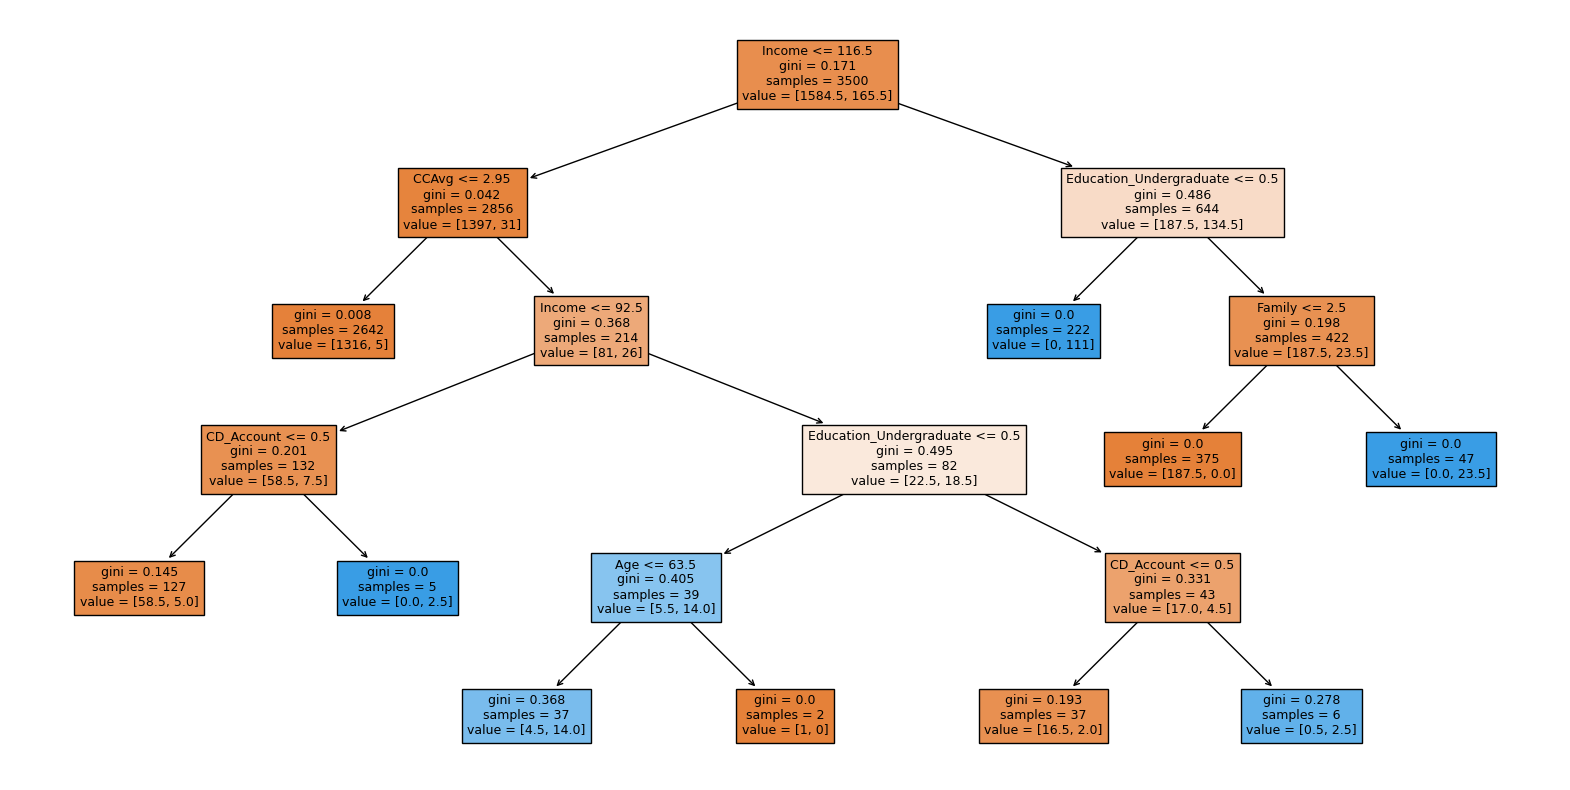

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* We are getting a simplified tree after pre-pruning.

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1316.00, 5.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [58.50, 5.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 2.50] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [4.50, 14.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [16.50, 2.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [0.50, 2.50] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 111.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50


#### Observations from the pre-pruned tree:

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the income is less than or equal to 116.50 and the average credit card spending (CCAvg) is less than or equal to 2.95, then the personal loan is more likely to be rejected.

In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Experience               0.000000
Mortgage                 0.000000
Securities_Account       0.000000
Online                   0.000000
CreditCard               0.000000
Education_Graduate       0.000000
Education_Professional   0.000000


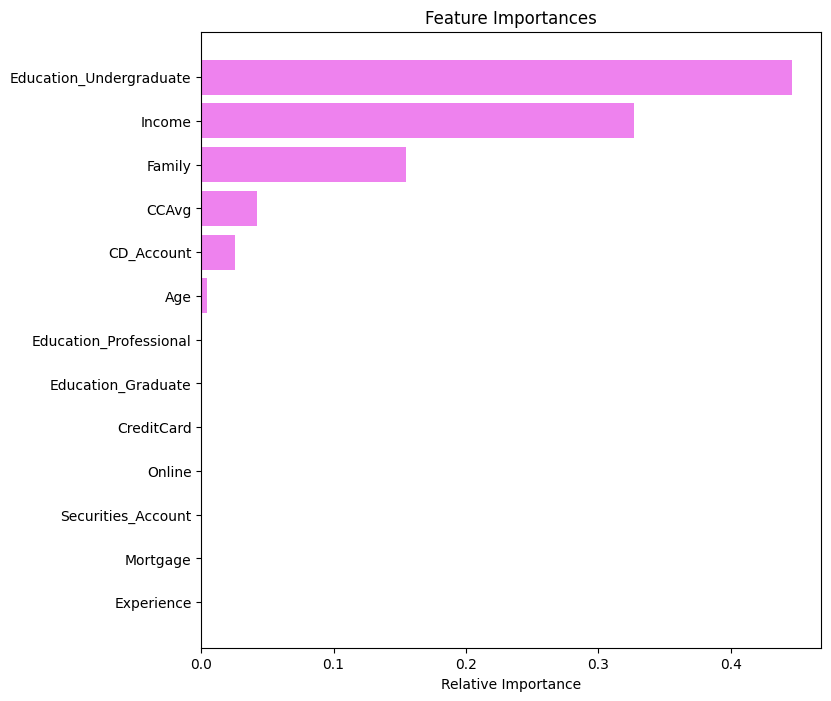

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost-Complexity pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train) # Generate cost-complexity pruning path for the decision tree
ccp_alphas, impurities = path.ccp_alphas, path.impurities # Extract alpha values from the pruning path

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000381,0.005168
9,0.000409,0.006804


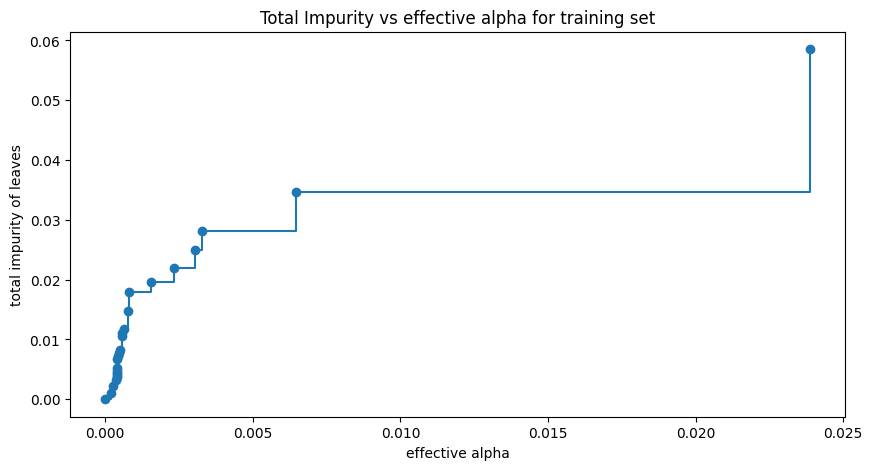

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Following the identification of effective alphas, we proceed to train a decision tree. The final value in the ccp_alphas array represents the alpha threshold that prunes the entire tree, resulting in the tree (clfs[-1]) containing only one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


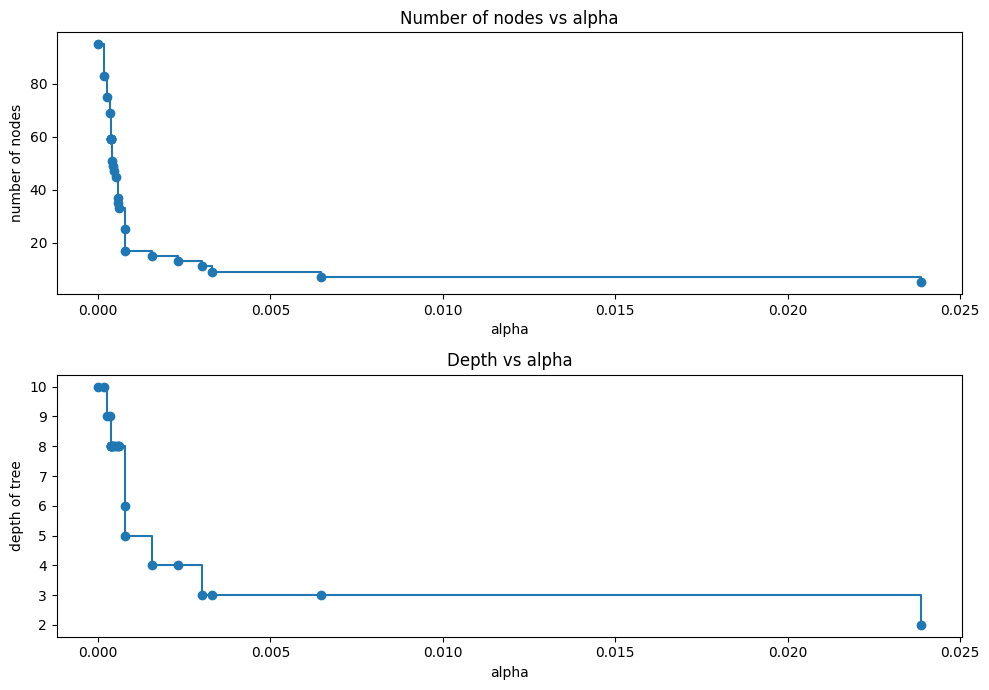

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### **Recall vs alpha for training and testing sets**

In [ ]:
recall_train = [] # Initialize an empty list to store recall scores for training set
for clf in clfs: # Loop over each classifier in 'clfs'
    pred_train = clf.predict(X_train) # Predict labels for the training set using the current classifier
    values_train = recall_score(y_train, pred_train) # Calculate recall score for the training set predictions
    recall_train.append(values_train) # Append the recall score to the 'recall_train' list

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

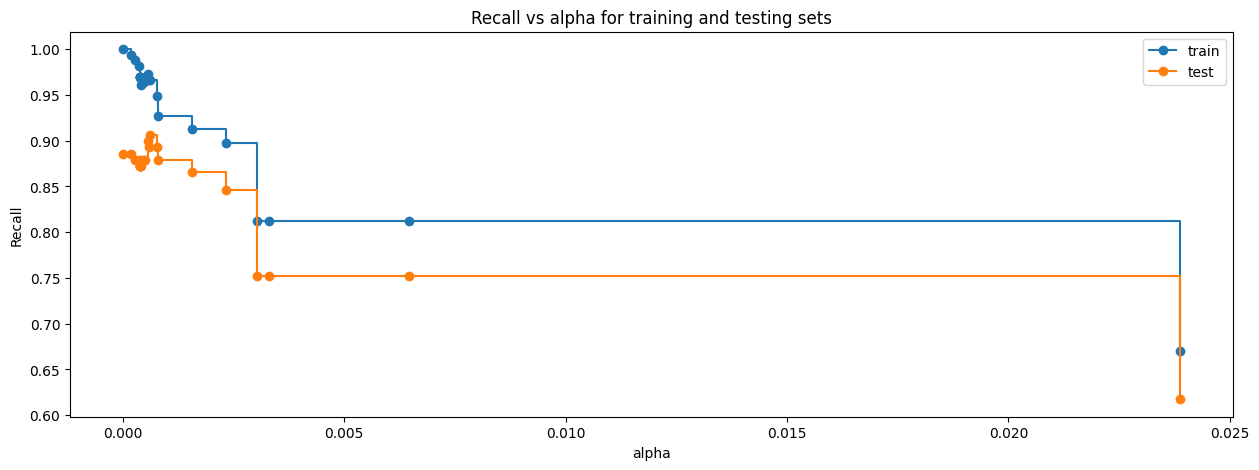

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


#### **Post pruning**

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[-1], class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02386594448205822,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Checking performance on training data

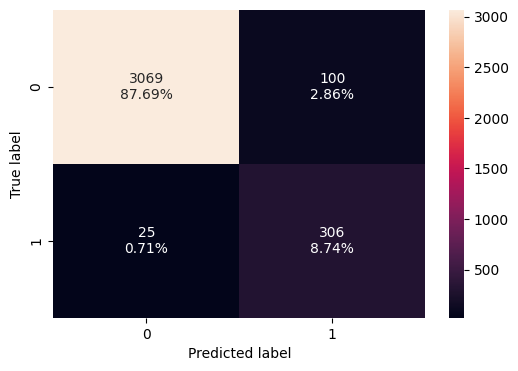

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.964286,0.924471,0.753695,0.830393


### Checking performance on testing data

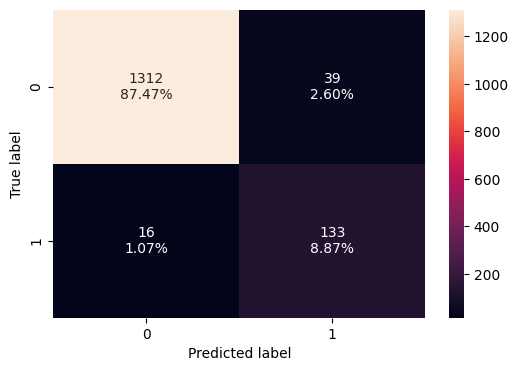

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.963333,0.892617,0.773256,0.82866


* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

### Visualizing the Decision Tree

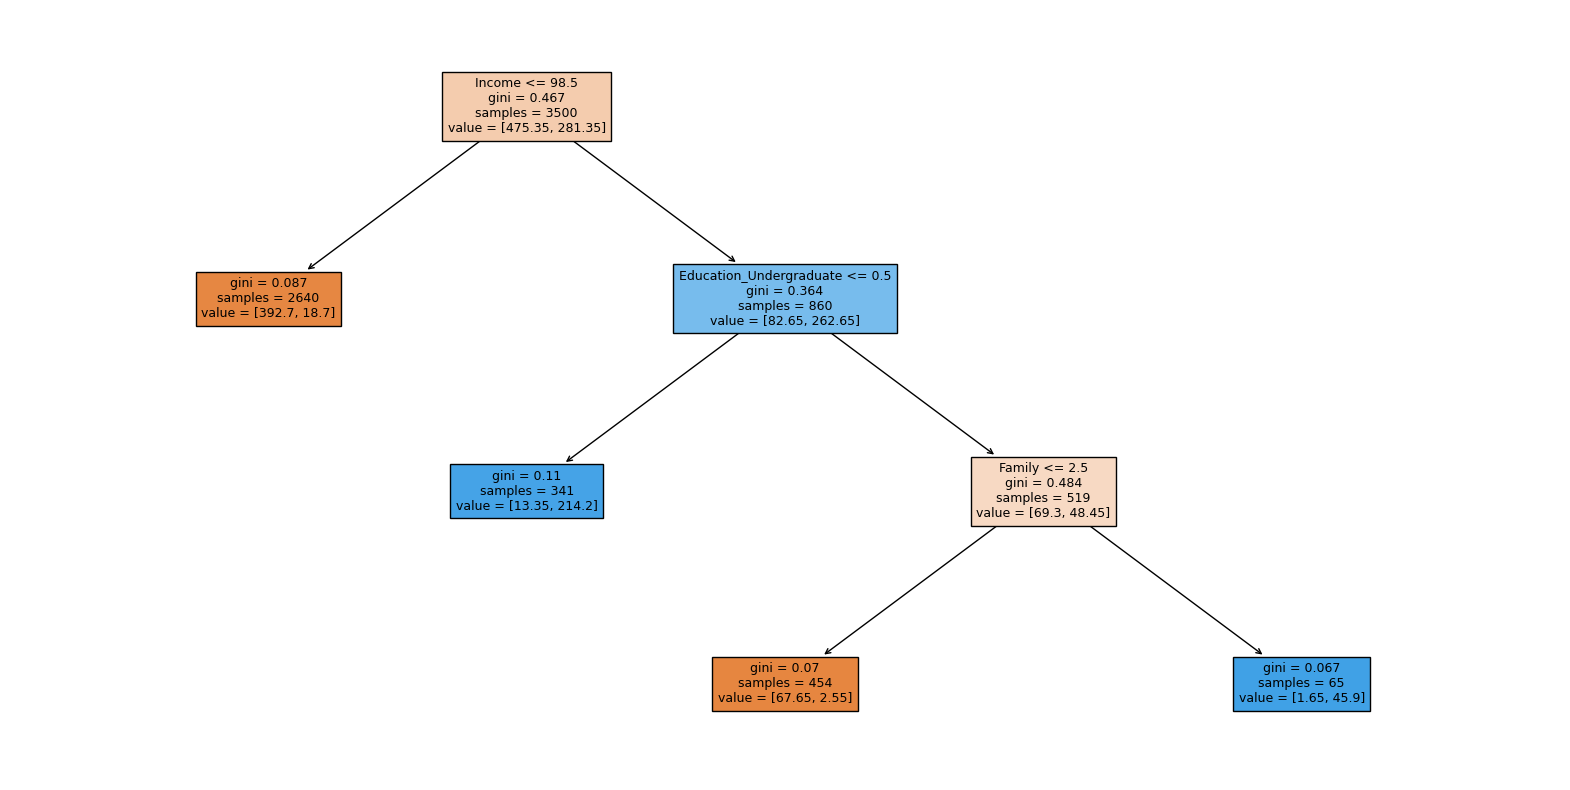

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

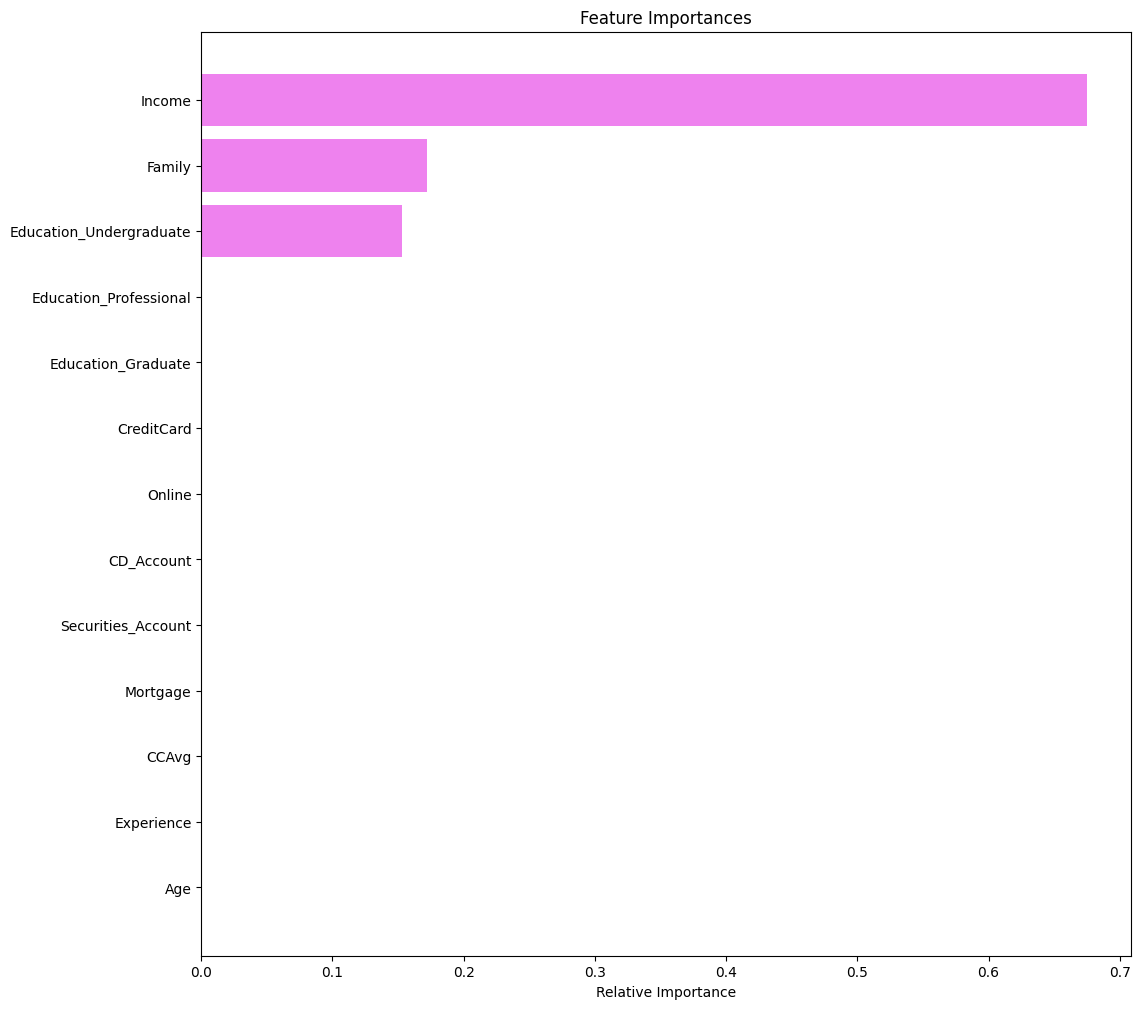

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family and Education_undergraduate remain the most important feature with post-pruning too.

## **Model Performance and Comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_post_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.964286
Recall,1.0,0.927492,0.924471
Precision,1.0,0.968454,0.753695
F1,1.0,0.947531,0.830393


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_post_test.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.980000,0.963333
Recall,0.885906,0.865772,0.892617
Precision,0.910345,0.928058,0.773256
F1,0.897959,0.895833,0.828660


* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

## Actionable Insights:

##### Pre-Pruning vs. Post-Pruning:

* Post-pruning the decision tree leads to significant improvements in accuracy, recall, precision, and F1 score compared to pre-pruning, indicating the effectiveness of pruning in reducing overfitting.
* Post-pruning helps the decision tree generalize better to unseen data by simplifying its structure and reducing complexity, which is evident from the improved performance on the test set.


##### Continuous Model Monitoring and Evaluation:

* Establish a robust monitoring and evaluation framework to continuously assess the performance of decision tree models deployed for personal loan prediction.
* Regularly evaluate model metrics such as accuracy, recall, precision, and F1 score on both training and test sets to identify any performance degradation or potential areas for improvement.

##### Customer Segmentation and Targeted Marketing:

* Leverage insights from the decision tree models to segment customers based on their likelihood of personal loan acceptance or rejection.
* Tailor marketing strategies and product offerings to different customer segments to maximize loan approval rates while minimizing the risk of defaults.

##### Summary

* The analysis commenced with Exploratory Data Analysis (EDA) to gain insights into the dataset and discern potential correlations. A Decision Tree Classifier method was employed to construct a model for predicting customer engagement with the bank, particularly in the context of personal loans. Multiple decision trees were created and visualized to assess model performance. Significant features were identified by examining their frequency of use in the decision-making process of the trees. Hyperparameter tuning and pruning techniques were applied to alleviate model overfitting and develop an optimized model.

## Business Recommendations:

* Among different decision tree models, it's noted that the Decision Tree exhibits the highest recall score, while pre-pruning demonstrates the lowest recall score. Considering the computational demands associated with the full decision tree model, opting for a simpler and faster post-pruning model might be advantageous.

* Clients with the highest income, advanced degrees, a family size of three, and higher average credit card spending are highlighted as key demographics for the bank to focus its attention on. These factors correlate positively with accepting personal loan offers.

* Seventy-five percent of customers who accepted a personal loan offer fall within the age range of 35 to 65 years old. It's less probable for customers below the age of 25 and above the age of 65 to accept the offer for a personal loan.

* Education, income, family size, and average spending on credit cards emerge as the primary predictors influencing client inclination towards pursuing a personal loan. Specifically, individuals with advanced/professional degrees show the highest propensity for accepting personal loan offers.

* Nearly 50% of customers with a Certificate of Deposit (CD) account accepted a personal loan offer.

* It's noteworthy that the impact of False Negatives (FN) on total losses in finance studies outweighs that of False Positives (FP). Consequently, maximizing Recall emerges as the optimal scoring metric, emphasizing the importance of correctly identifying instances of loan acceptance.

* Regarding customer demographics, it's observed that customers aged between 35 to 65 years old are most likely to accept personal loan offers, with lesser likelihoods for those below 25 and above 65. Additionally, customers with between 10 and 30 years of experience, income above 120 thousand dollars, and average credit card usage between 2200 dollars and 5000 dollars are more inclined towards approving personal loan offers.

* Furthermore, nearly half of customers holding a Certificate of Deposit (CD) account have accepted personal loan offers, suggesting a positive correlation between CD accounts and personal loan approvals.